In [1]:
import pandas as pd
import sqlite3

- analyze only the users and not the admins
- analyze only the dates when there were both views and checker commits
- use size of the font should be 8
- the size of the figure is (15,8)
- at the end of your Jupyter Notebook create a markdown cell and insert the question:
“How many times was the number of views larger than 150?” Insert: “The answer
is ___”. Put the number in the text instead of the underline.

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [32]:
query = """SELECT 
            DATE(timestamp) AS date, 
            COUNT(*) as count_commits 
        FROM checker 
        WHERE uid LIKE 'user_%' 
        GROUP BY DATE(timestamp);"""
checker = pd.io.sql.read_sql(query, conn, index_col='date')
checker.head(5)

,count_commits
date,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25


In [33]:
query = """SELECT 
                DATE(datetime) AS date, 
                COUNT(*) as count_views 
            FROM pageviews 
            WHERE uid LIKE 'user_%' 
            GROUP BY DATE(datetime);"""
pageviews = pd.io.sql.read_sql(query, conn, index_col='date')
pageviews.head(5)

,count_views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [53]:
df = pd.concat([checker, pageviews], axis=1, join='inner').reset_index()
df.head(5)

,date,count_commits,count_views
0,2020-04-17,23,1
1,2020-04-18,69,23
2,2020-04-19,33,15
3,2020-04-21,25,3
4,2020-04-22,28,1


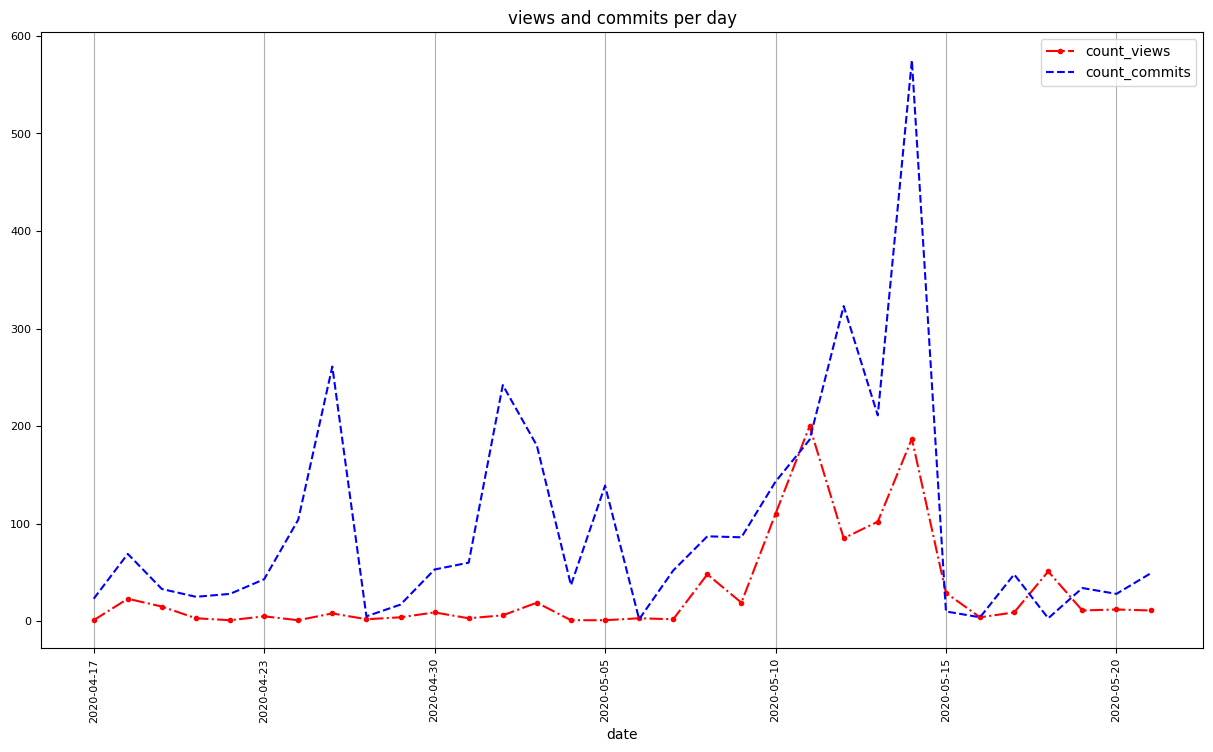

In [76]:
df.plot(x='date', 
        y=['count_views', 'count_commits'], 
        title='views and commits per day',
        rot=90, 
        figsize=(15, 8), 
        fontsize=8,
        color=['r', 'b'],
        style=['-..', '--']).grid(axis='x')

In [ ]:
conn.close()

In [48]:
df[df.count_views > 150].shape[0]

2


“How many times was the number of views larger than 150?” Insert: “The answer
is 2”.